<a href="https://colab.research.google.com/github/CheyQ27/Main-Projects/blob/main/Project_2_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price in Beijing
- Cheyenne Quann
- 06/15/2022

1) My source of data is https://www.kaggle.com/datasets/ruiqurm/lianjia and all data was fetched from https://bj.lianjia.com/chengjiao

2) This set contains extensive and pertinent information on the housing market in Beijing, China. This set is geared toward educating potential home buyers, containing information on price, home size, condition, community information and how long properties have been on the market.

3) My target will be the price of a home or the total price

4) This is a regression problem

5) There will be between 22 and 23 features

6) There are 200,000 rows in my dataset

7) The biggest challenge that I foresee is how I will split my data. I want to predict future housing prices so I need to figure out how to make my training set houses before a certain date and my testing set houses after that date

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/DataSets/200khouses.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,272244,https://bj.lianjia.com/chengjiao/BJSJ86937015....,BJSJ86937015,116.212671,39.900574,1.111027e+12,2014-01-01,NaN,5,450.0,...,3.0,未知,1,6,0.667,1.0,0.0,0.0,9,57942.0
1,183723,https://bj.lianjia.com/chengjiao/BJCY91181857....,BJCY91181857,116.445582,39.974979,1.111027e+12,2015-12-31,1.0,16,260.0,...,4.0,1998,3,6,0.333,0.0,1.0,1.0,7,66102.0
2,99668,https://bj.lianjia.com/chengjiao/BJCP85595070....,BJCP85595070,116.439420,40.072066,1.111027e+12,2015-03-24,1.0,13,237.0,...,4.0,2001,4,2,0.500,0.0,1.0,0.0,6,40934.0
3,181505,https://bj.lianjia.com/chengjiao/BJCY90950230....,BJCY90950230,116.481632,39.927935,1.111027e+12,2016-01-10,1.0,17,174.0,...,4.0,1987,3,6,0.167,1.0,1.0,1.0,7,67899.0
4,254148,https://bj.lianjia.com/chengjiao/BJHD88117786....,BJHD88117786,116.338384,39.934691,1.111027e+12,2014-11-24,1.0,3,280.0,...,4.0,1990,4,2,0.125,0.0,1.0,1.0,8,96480.0


In [ ]:
df.shape

(200000, 27)

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'url', 'id', 'lng', 'lat', 'cid', 'tradetime', 'dom',
       'followers', 'totalprice', 'price', 'square', 'livingroom',
       'drawingroom', 'kitchen', 'bathroom', 'floor', 'buildingtype',
       'constructiontime', 'renovationcondition', 'buildingstructure',
       'ladderratio', 'elevator', 'fiveyearsproperty', 'subway', 'district',
       'communityaverage'],
      dtype='object')

In [ ]:
def explore_data(df):
  
  # Explore Columns
  print('Columns:')
  display(df.info())
  print('\n')

  # Find duplicates
  print(f'{df.duplicated().sum()} Duplicates Found \n')

  # Check for missing values
  print('Missing Values')
  display(df.isna().sum())
  print('\n')

  # Examine categories
  for col in df.select_dtypes(object).columns:
    print(col)
    display(df[col].value_counts())
    print('\n')

  # Show Summary Statistics
  display(df.describe(include='all'))
  

# EDA And Cleaning

In [ ]:
explore_data(df)

Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   unnamed: 0           200000 non-null  int64  
 1   url                  200000 non-null  object 
 2   id                   200000 non-null  object 
 3   lng                  200000 non-null  float64
 4   lat                  200000 non-null  float64
 5   cid                  200000 non-null  float64
 6   tradetime            200000 non-null  object 
 7   dom                  100816 non-null  float64
 8   followers            200000 non-null  int64  
 9   totalprice           200000 non-null  float64
 10  price                200000 non-null  int64  
 11  square               200000 non-null  float64
 12  livingroom           200000 non-null  object 
 13  drawingroom          200000 non-null  object 
 14  kitchen              200000 non-null  int64  
 15  bathroom

None



0 Duplicates Found 

Missing Values


unnamed: 0                 0
url                        0
id                         0
lng                        0
lat                        0
cid                        0
tradetime                  0
dom                    99184
followers                  0
totalprice                 0
price                      0
square                     0
livingroom                 0
drawingroom                0
kitchen                    0
bathroom                   0
floor                      0
buildingtype            1277
constructiontime           0
renovationcondition        0
buildingstructure          0
ladderratio                0
elevator                  22
fiveyearsproperty         22
subway                    22
district                   0
communityaverage         278
dtype: int64



url


https://bj.lianjia.com/chengjiao/BJSJ86937015.html    1
https://bj.lianjia.com/chengjiao/BJCY84360856.html    1
https://bj.lianjia.com/chengjiao/BJCY84696021.html    1
https://bj.lianjia.com/chengjiao/BJCP88971686.html    1
https://bj.lianjia.com/chengjiao/BJHD84430590.html    1
                                                     ..
https://bj.lianjia.com/chengjiao/BJDX86739741.html    1
https://bj.lianjia.com/chengjiao/101100963168.html    1
https://bj.lianjia.com/chengjiao/BJCY91118544.html    1
https://bj.lianjia.com/chengjiao/BJHD84137543.html    1
https://bj.lianjia.com/chengjiao/BJXC84983361.html    1
Name: url, Length: 200000, dtype: int64



id


BJSJ86937015    1
BJCY84360856    1
BJCY84696021    1
BJCP88971686    1
BJHD84430590    1
               ..
BJDX86739741    1
101100963168    1
BJCY91118544    1
BJHD84137543    1
BJXC84983361    1
Name: id, Length: 200000, dtype: int64



tradetime


2016-02-28    677
2016-07-31    614
2016-03-06    579
2016-08-31    572
2016-03-05    534
             ... 
2011-01-26      1
2010-04-05      1
2010-12-22      1
2010-09-09      1
2011-09-02      1
Name: tradetime, Length: 2501, dtype: int64



livingroom


2         100582
1          51684
3          42498
4           4344
5            701
6            125
7             22
#NAME?        22
0             15
8              4
9              3
Name: livingroom, dtype: int64



drawingroom


1       141493
2        45634
0        12251
3          564
4           31
低 6          7
5            5
中 6          4
中 16         2
高 14         2
中 24         1
顶 6          1
低 15         1
底 20         1
低 16         1
中 14         1
底 11         1
Name: drawingroom, dtype: int64



bathroom


1       137059
2        27655
1        26860
2         5446
3         1726
0          473
3          306
4          261
0           88
4           54
5           31
5           11
6            6
2006         5
2004         4
2003         4
1990         2
2005         2
2000         2
未知           1
7            1
7            1
1994         1
2000         1
Name: bathroom, dtype: int64



floor


中 6     21681
顶 6     14297
高 6     13230
低 6      9898
底 6      8341
        ...  
低 35        1
低 63        1
低 36        1
低 37        1
低 5         1
Name: floor, Length: 201, dtype: int64



constructiontime


2004    13154
2003    12137
未知      12093
2005    11878
2006     9221
        ...  
1952        4
1968        4
1944        2
1961        1
1914        1
Name: constructiontime, Length: 71, dtype: int64

,unnamed: 0,url,id,lng,lat,cid,tradetime,dom,followers,totalprice,...,buildingtype,constructiontime,renovationcondition,buildingstructure,ladderratio,elevator,fiveyearsproperty,subway,district,communityaverage
count,200000.000000,200000,200000,200000.000000,200000.000000,2.000000e+05,200000,100816.000000,200000.000000,200000.000000,...,198723.000000,200000,200000.000000,200000.000000,2.000000e+05,199978.000000,199978.000000,199978.000000,200000.000000,199722.000000
unique,NaN,200000,200000,NaN,NaN,NaN,2501,NaN,NaN,NaN,...,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,https://bj.lianjia.com/chengjiao/BJSJ86937015....,BJSJ86937015,NaN,NaN,NaN,2016-02-28,NaN,NaN,NaN,...,NaN,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,NaN,NaN,NaN,677,NaN,NaN,NaN,...,NaN,13154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,159390.940465,NaN,NaN,116.418741,39.949671,1.123246e+12,NaN,28.936379,16.786265,349.473671,...,3.006926,NaN,2.607750,4.454635,5.042743e+01,0.578169,0.646411,0.601411,6.768835,63678.183505
std,91980.092832,NaN,NaN,0.112193,0.091854,1.192295e+12,NaN,50.561532,34.392438,229.575629,...,1.271434,NaN,1.311563,1.901186,2.238170e+04,0.493853,0.478085,0.489609,2.811960,22298.489601
min,0.000000,NaN,NaN,116.072514,39.627030,1.111027e+12,NaN,1.000000,0.000000,0.100000,...,0.048000,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,79810.750000,NaN,NaN,116.345084,39.893471,1.111027e+12,NaN,1.000000,0.000000,205.000000,...,1.000000,NaN,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,159374.500000,NaN,NaN,116.416780,39.934530,1.111027e+12,NaN,6.000000,5.000000,293.600000,...,4.000000,NaN,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59021.000000
75%,239184.250000,NaN,NaN,116.477730,40.003018,1.111027e+12,NaN,37.000000,18.000000,426.000000,...,4.000000,NaN,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75993.000000


In [ ]:
#remove duplicates
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
#remove unncessary columns
df = df.drop(columns=['unnamed: 0','url','id','totalprice','constructiontime',
             'dom','followers','livingroom','drawingroom','kitchen','bathroom',
             'floor','ladderratio','elevator','fiveyearsproperty','subway','tradetime'])

In [ ]:
#changed to an object dtype because the value is nomminal and categorical 
df['cid']=df['cid'].astype(object)

In [ ]:
#examine unique values
df.nunique()
#this looks likeprice will be a great target to predict

lng                     3868
lat                     3870
cid                     3907
price                  69301
square                 16781
buildingtype               9
renovationcondition        5
buildingstructure          7
district                  13
communityaverage        3959
dtype: int64

In [ ]:
# Check columns, rows, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   lng                  200000 non-null  float64
 1   lat                  200000 non-null  float64
 2   cid                  200000 non-null  object 
 3   price                200000 non-null  int64  
 4   square               200000 non-null  float64
 5   buildingtype         198723 non-null  float64
 6   renovationcondition  200000 non-null  int64  
 7   buildingstructure    200000 non-null  int64  
 8   district             200000 non-null  int64  
 9   communityaverage     199722 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 16.8+ MB


- Checking the value count of my columns

In [ ]:
df['communityaverage'].value_counts()

92360.0     960
54263.0     952
50205.0     827
40934.0     820
64222.0     775
           ... 
41755.0       1
44785.0       1
40066.0       1
103070.0      1
116003.0      1
Name: communityaverage, Length: 3959, dtype: int64

In [ ]:
df['district'].value_counts()

7     67560
6     24087
8     24007
10    19558
2     18431
1     10659
4      9481
11     8760
9      7105
13     5844
5      1884
3      1549
12     1075
Name: district, dtype: int64

In [ ]:
df['buildingstructure'].value_counts()

6    118168
2     72445
4      8958
3       160
1       132
5       117
0        20
Name: buildingstructure, dtype: int64

In [ ]:
df['renovationcondition'].value_counts()

1    74390
4    73736
3    48504
2     3352
0       18
Name: renovationcondition, dtype: int64

In [ ]:
df['buildingtype'].value_counts()

4.000    108016
1.000     53249
3.000     37353
2.000        83
0.500        10
0.048         4
0.333         4
0.125         3
0.375         1
Name: buildingtype, dtype: int64

In [ ]:
df['square'].value_counts()

89.00     345
58.00     330
60.00     275
57.00     252
61.00     237
         ... 
137.19      1
291.96      1
34.62       1
185.06      1
212.73      1
Name: square, Length: 16781, dtype: int64

In [ ]:
#this 3 value looks to me like it should have been 30000
df['price'].value_counts()

50000     126
40000      71
3          62
60000      58
100000     49
         ... 
75067       1
96147       1
79929       1
62106       1
87651       1
Name: price, Length: 69301, dtype: int64

In [ ]:
df['price'] = df['price'].replace('3', '30000')

In [ ]:
df['cid'].value_counts()

1.111027e+12    961
1.111027e+12    960
1.111027e+12    828
1.111027e+12    820
1.111027e+12    775
               ... 
1.111027e+12      1
1.111027e+12      1
1.111046e+12      1
1.111027e+12      1
1.111027e+12      1
Name: cid, Length: 3907, dtype: int64

In [ ]:
df['lat'].value_counts()

39.900529    961
39.919830    960
40.074228    828
40.072066    820
39.906426    775
            ... 
39.880653      1
39.926823      1
39.907219      1
40.093094      1
39.886165      1
Name: lat, Length: 3870, dtype: int64

In [ ]:
df['lng'].value_counts()

116.343245    961
116.609957    960
116.330198    828
116.439420    820
116.512916    796
             ... 
116.471372      1
116.251668      1
116.508402      1
116.477605      1
116.385460      1
Name: lng, Length: 3868, dtype: int64

In [ ]:
#not too many missing, will most likely impute in my preprocessor pipeline
df.isna().sum()

lng                       0
lat                       0
cid                       0
price                     0
square                    0
buildingtype           1277
renovationcondition       0
buildingstructure         0
district                  0
communityaverage        278
dtype: int64

In [ ]:
#no outliers to mention
df.describe(include='all')

,lng,lat,cid,price,square,buildingtype,renovationcondition,buildingstructure,district,communityaverage
count,200000.000000,200000.000000,2.000000e+05,200000.00000,200000.000000,198723.000000,200000.000000,200000.000000,200000.000000,199722.000000
mean,116.418741,39.949671,1.123246e+12,43535.37467,83.331072,3.006926,2.607750,4.454635,6.768835,63678.183505
std,0.112193,0.091854,1.192295e+12,21728.39398,37.115681,1.271434,1.311563,1.901186,2.811960,22298.489601
min,116.072514,39.627030,1.111027e+12,1.00000,6.900000,0.048000,0.000000,0.000000,1.000000,10847.000000
25%,116.345084,39.893471,1.111027e+12,28046.00000,57.940000,1.000000,1.000000,2.000000,6.000000,46339.000000
50%,116.416780,39.934530,1.111027e+12,38728.50000,74.300000,4.000000,3.000000,6.000000,7.000000,59021.000000
75%,116.477730,40.003018,1.111027e+12,53799.25000,98.830000,4.000000,4.000000,6.000000,8.000000,75993.000000
max,116.732378,40.252758,1.184867e+14,156250.00000,906.000000,4.000000,4.000000,6.000000,13.000000,183109.000000


# Exploratory visualizations and Analysis

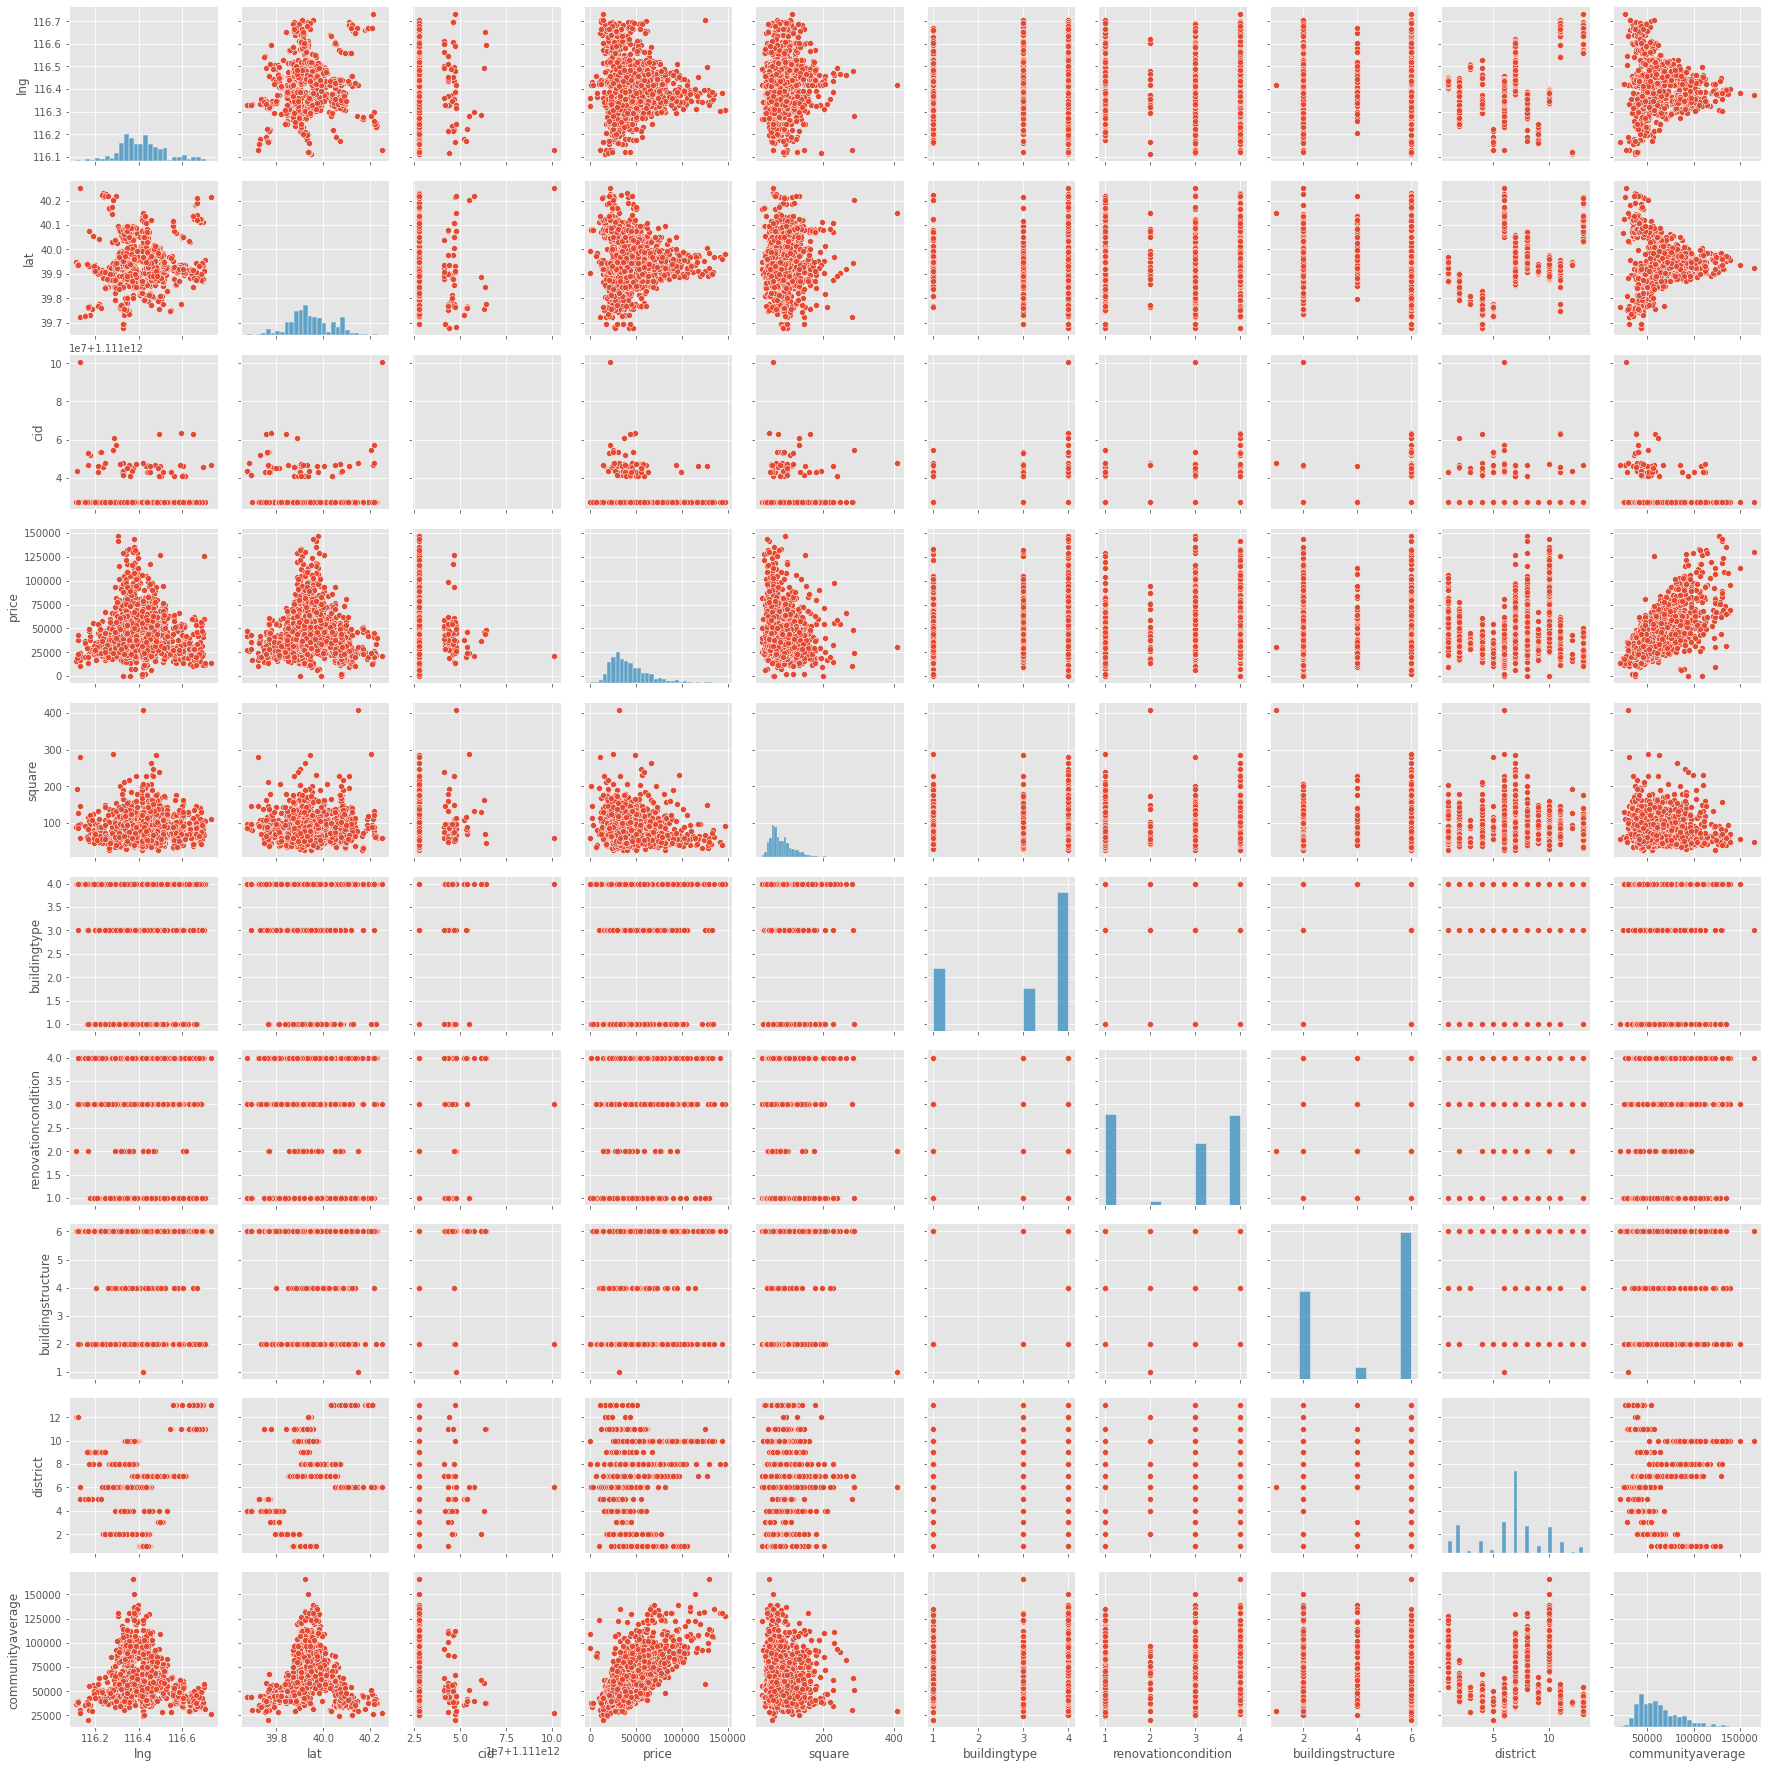

In [ ]:
#My dataset's size means that I may need to use samples for a few of my visualizations
#Explored Distributions
sns.pairplot(df.sample(1500))

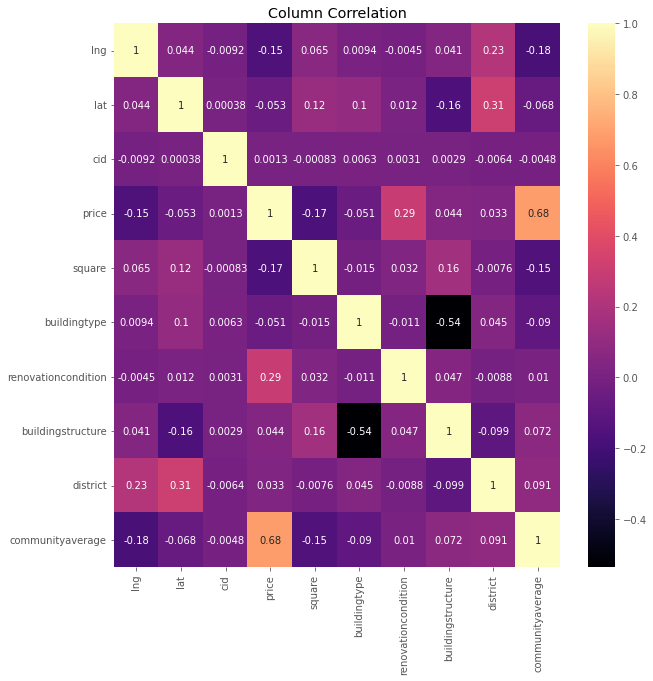

In [ ]:
#On first glance price and community average share a strong correlation and that may be something to explore
#Theres is also a moderate negative correlation betwween the building structure and the building type
corr = df.corr()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,cmap= 'magma', annot = True,);
plt.title('Column Correlation');

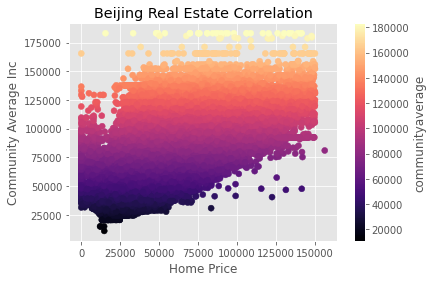

In [ ]:
#As the the community average income increases we can see the property prices increase
#I think this scatter could be a nice visual for an employer I just need help increasing the numbers on the x and y axis
#as to scale it back so it doesn't look so cluttered
plt.style.use('ggplot')
plt.scatter(df['price'], df['communityaverage'], c=df['communityaverage'], cmap='magma');
plt.colorbar(label='communityaverage')
plt.title('Beijing Real Estate Correlation')
plt.ylabel('Community Average Inc')
plt.xlabel('Home Price');

##Analysis of visuals
My plots show a map of the Beijing communities coloring each point by price of homes in the first plot and by the aver community income in the second plot.
My first observation was that of coure the maps are identical but the community average income plot differs from the price map plot in that toward the center of the plot there is a higher concentration of high incomes.
The closer one moves to 39.9 lat, 116.4 lng the more expensive the homes. Thus visualizing what my correlation plot plots have may clear. There is a strong positive correlation between the prices of the homes and the incomes of the people that live in those communities.

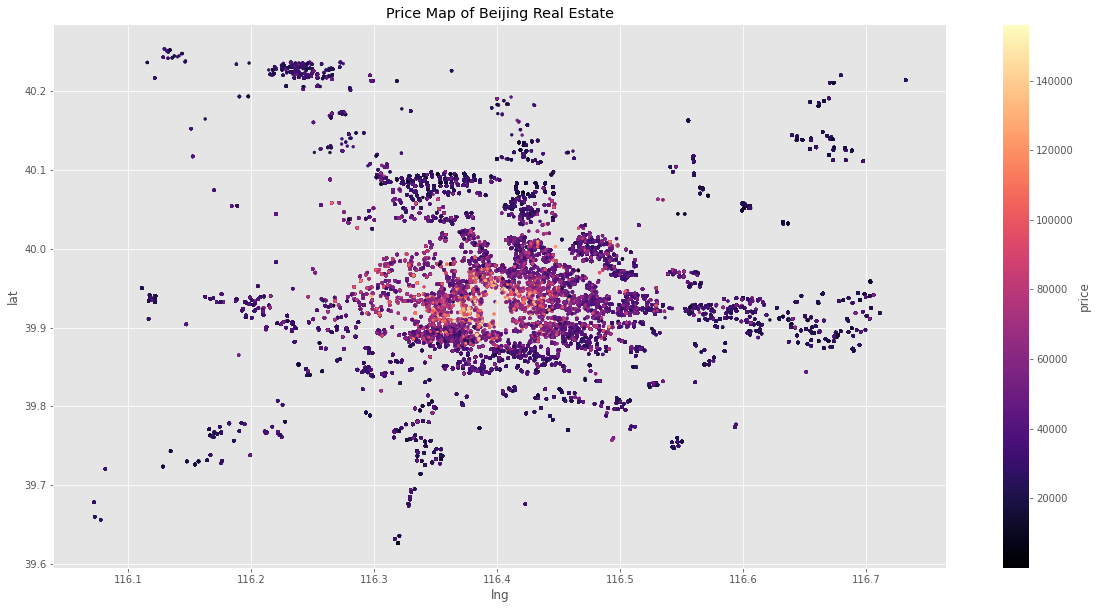

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.scatter(df['lng'], df['lat'], c=df['price'], cmap='magma', s=8);
plt.colorbar(label='price')
plt.title('Price Map of Beijing Real Estate')
plt.ylabel('lat')
plt.xlabel('lng')
plt.show();

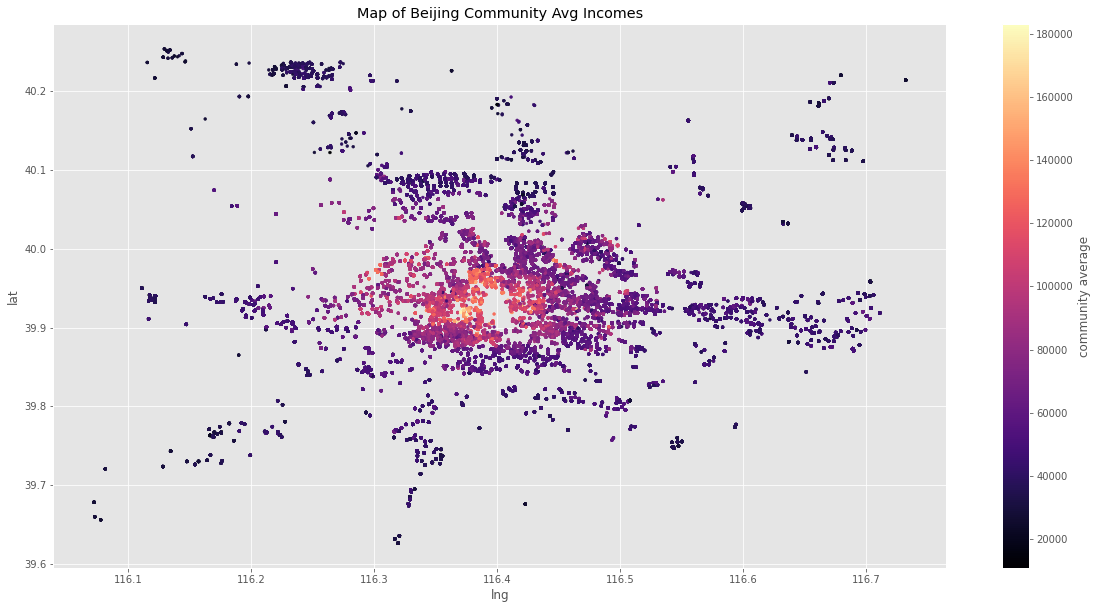

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.scatter(df['lng'], df['lat'], c=df['communityaverage'], cmap='magma', s=8);
plt.colorbar(label='community average')
plt.title('Map of Beijing Community Avg Incomes')
plt.ylabel('lat')
plt.xlabel('lng')
plt.show();